In [ ]:
import praw
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Configuração da API do Reddit
reddit = praw.Reddit(
    client_id="lK3O2iN0BKwey2ksicdurw",  # App ID fornecido no Reddit Developer Portal
    client_secret="Geqdg3qH-M4ZdbKu_J9U8Z1XOB3-5g",  # App secret obtido na interface
    user_agent="Projeto de Sentimentos",  # Nome do aplicativo (como visto na interface)
)

# Escolhendo o subreddit
subreddit = reddit.subreddit("technology")  # Substitua "technology" pelo subreddit desejado

# Coletando as postagens mais populares
posts = []
for post in subreddit.hot(limit=100):  # Limitando a coleta para 100 postagens
    posts.append(post.title)  # Armazenando os títulos das postagens na lista

# Dataset de treinamento (exemplo simples)
dados = {
    "Título": [
        "Novo modelo de IA revolucionário",
        "Python é a melhor linguagem de programação",
        "Avanços na computação quântica",
        "Guia para iniciantes em aprendizado de máquina",
        "Tecnologia 5G está mudando o mundo",
        "Como aprender JavaScript do zero",
        "Robôs estão substituindo empregos humanos"
    ],
    "Categoria": [
        "inteligência artificial",
        "programação",
        "tecnologia",
        "inteligência artificial",
        "tecnologia",
        "programação",
        "tecnologia"
    ]
}

# Criando o dataset
import pandas as pd
df = pd.DataFrame(dados)

# Treinamento do modelo
vetorizador = TfidfVectorizer()
X = vetorizador.fit_transform(df["Título"])  # Vetorização do texto
y = df["Categoria"]  # Rótulos das categorias
modelo = MultinomialNB()
modelo.fit(X, y)

# Classificação dos títulos coletados do Reddit
X_novos = vetorizador.transform(posts)  # Vetorizando os novos títulos
categorias_preditas = modelo.predict(X_novos)

# Exibindo os resultados
print("Classificação dos Títulos Coletados do Reddit:")
for titulo, categoria in zip(posts, categorias_preditas):
    print(f"Título: {titulo}")
    print(f"Categoria: {categoria}")
    print()

Postagens Coletadas:
1. Hegseth had unsecured internet line in Pentagon for Signal, sources say
2. Mark Zuckerberg Says Social Media Is Over
3. Volkswagen Overtakes Tesla As Europe's Top EV Seller
4. Discord confirms it's moving toward 'becoming a public company' as it hires a former Activision executive as its new CEO
5. Americans Believe Russian Disinformation ‘To Alarming Degree’
6. Trump updates Biden’s robo-car crash reporting rule to benefit Tesla
7. Hegseth Set Up Signal on a Computer in His Pentagon Office. The app facilitated communications in a building where cell service is poor and personal phones are not allowed in some areas.
8. A Sydney radio station has been using an AI-generated host for about six months without disclosing it
9. Comcast president bemoans broadband customer losses: “We are not winning” | Exec says lack of "price transparency and predictability" drove customers away.
10. NSF director resigns amid 55% budget cut, mass layoffs from Trump admin - Ars Techni

In [22]:
from textblob import TextBlob

# Função para análise de sentimento
def analisar_sentimento(texto):
    analise = TextBlob(texto)
    if analise.sentiment.polarity > 0:
        return 'Positivo'
    elif analise.sentiment.polarity == 0:
        return 'Neutro'
    else:
        return 'Negativo'

# Realizando a análise de sentimento
resultados = [analisar_sentimento(post) for post in posts]

# Exibindo os resultados
print("Análise de Sentimentos das Postagens:")
for i, (post, sentimento) in enumerate(zip(posts, resultados), start=1):
    print(f"{i}. Título: {post}")
    print(f"   Sentimento: {sentimento}")

Análise de Sentimentos das Postagens:
1. Título: Hegseth had unsecured internet line in Pentagon for Signal, sources say
   Sentimento: Neutro
2. Título: Mark Zuckerberg Says Social Media Is Over
   Sentimento: Positivo
3. Título: Volkswagen Overtakes Tesla As Europe's Top EV Seller
   Sentimento: Positivo
4. Título: Discord confirms it's moving toward 'becoming a public company' as it hires a former Activision executive as its new CEO
   Sentimento: Positivo
5. Título: Americans Believe Russian Disinformation ‘To Alarming Degree’
   Sentimento: Negativo
6. Título: Trump updates Biden’s robo-car crash reporting rule to benefit Tesla
   Sentimento: Neutro
7. Título: Hegseth Set Up Signal on a Computer in His Pentagon Office. The app facilitated communications in a building where cell service is poor and personal phones are not allowed in some areas.
   Sentimento: Negativo
8. Título: A Sydney radio station has been using an AI-generated host for about six months without disclosing it
  

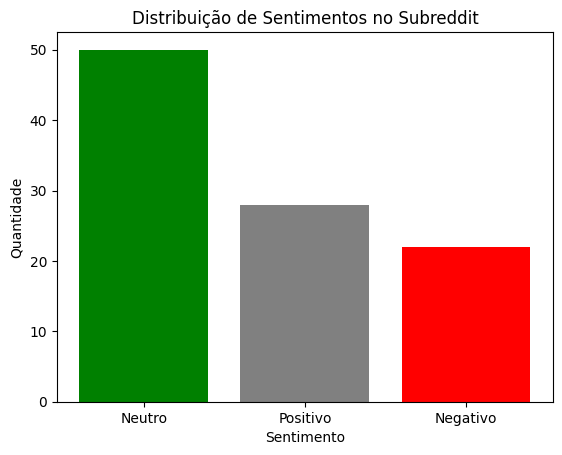

In [23]:
import matplotlib.pyplot as plt

# Contando sentimentos
from collections import Counter
contagem = Counter(resultados)

# Gerando gráfico
plt.bar(contagem.keys(), contagem.values(), color=['green', 'grey', 'red'])
plt.title('Distribuição de Sentimentos no Subreddit')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.show()

In [24]:
from collections import Counter
import re

# Processamento dos títulos para encontrar padrões
palavras = []
for title in posts:
    palavras.extend(re.findall(r"\w+", title.lower()))  # Quebra os títulos em palavras e converte para minúsculas

contagem = Counter(palavras)
print("Palavras mais frequentes nos títulos:")
for palavra, freq in contagem.most_common(10):  # Mostra as 10 palavras mais frequentes
    print(f"{palavra}: {freq}")

Palavras mais frequentes nos títulos:
to: 49
the: 37
a: 32
and: 25
in: 23
s: 22
of: 22
is: 16
for: 15
on: 15


In [25]:
from textblob import TextBlob

# Análise de sentimento para cada título
sentimentos = {"Positivo": 0, "Neutro": 0, "Negativo": 0}

for title in posts:
    analise = TextBlob(title)
    if analise.sentiment.polarity > 0:
        sentimentos["Positivo"] += 1
    elif analise.sentiment.polarity == 0:
        sentimentos["Neutro"] += 1
    else:
        sentimentos["Negativo"] += 1

print("Distribuição dos Sentimentos nos Títulos:")
for sentimento, quantidade in sentimentos.items():
    print(f"{sentimento}: {quantidade}")

Distribuição dos Sentimentos nos Títulos:
Positivo: 28
Neutro: 50
Negativo: 22


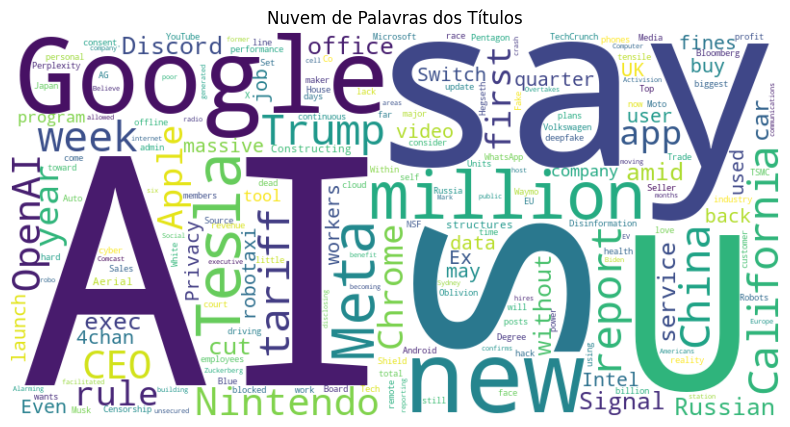

In [27]:
from wordcloud import WordCloud

# Gerando a nuvem de palavras
texto = " ".join(posts)  # Combina todos os títulos em um único texto
nuvem_palavras = WordCloud(width=800, height=400, background_color="white").generate(texto)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras dos Títulos")
plt.show()

In [28]:
from datetime import datetime

# Coletando os timestamps das postagens
timestamps = []
for post in subreddit.hot(limit=100):
    timestamps.append(datetime.fromtimestamp(post.created_utc))

# Exibindo os timestamps coletados
print("Horários das postagens:")
for timestamp in timestamps[:10]:  # Mostra os 10 primeiros
    print(timestamp)

Horários das postagens:
2025-04-24 18:13:40
2025-04-24 14:06:53
2025-04-24 15:17:42
2025-04-24 20:10:31
2025-04-24 07:40:24
2025-04-24 19:55:07
2025-04-24 09:31:43
2025-04-24 23:04:44
2025-04-24 21:09:13
2025-04-25 00:00:45


In [29]:
# Filtrando postagens que contenham a palavra "AI"
palavra_chave = "AI"
postagens_filtradas = [post for post in posts if palavra_chave.lower() in post.lower()]

print(f"Postagens com a palavra '{palavra_chave}':")
for i, title in enumerate(postagens_filtradas, start=1):
    print(f"{i}. {title}")

Postagens com a palavra 'AI':
1. A Sydney radio station has been using an AI-generated host for about six months without disclosing it
2. Teachers Are Using AI to Grade Papers—While Banning Students From It
3. Waymo reports 250,000 paid robotaxi rides per week in U.S.
4. 4chan has been offline for over a week, and it's probably not coming back | Source code, admin email addresses, and subscriber info were all exposed in massive hack
5. Blue Shield of California shared private health data of 4.7 million members with Google without consent | A lot of personal details were used for targeted advertising
6. China isn’t trying to win the AI race | Beijing may have quietly concluded that being a close second to the US serves its interests better
7. Anger as Meta AI chatbot added to WhatsApp, raising privacy fears
8. AI supercomputers could need as much power as a major city center by 2030, study says
9. AI secretly helped write California bar exam, sparking uproar | A contractor used AI to cr

In [30]:
# Coletando informações adicionais
postagens_detalhadas = []
for post in subreddit.hot(limit=100):
    postagens_detalhadas.append({
        "Título": post.title,
        "Autor": post.author.name if post.author else "Desconhecido",
        "Comentários": post.num_comments,
        "Pontuação": post.score
    })

# Exibindo os dados coletados
for postagem in postagens_detalhadas[:5]:  # Mostra os 5 primeiros resultados
    print(postagem)

{'Título': 'Hegseth had unsecured internet line in Pentagon for Signal, sources say', 'Autor': 'Strict-Ebb-8959', 'Comentários': 656, 'Pontuação': 21874}
{'Título': 'Mark Zuckerberg Says Social Media Is Over', 'Autor': 'lurker_bee', 'Comentários': 1474, 'Pontuação': 9492}
{'Título': "Volkswagen Overtakes Tesla As Europe's Top EV Seller", 'Autor': 'BreakfastTop6899', 'Comentários': 314, 'Pontuação': 6411}
{'Título': "Discord confirms it's moving toward 'becoming a public company' as it hires a former Activision executive as its new CEO", 'Autor': 'FervidBug42', 'Comentários': 370, 'Pontuação': 2250}
{'Título': 'Americans Believe Russian Disinformation ‘To Alarming Degree’', 'Autor': 'Wagamaga', 'Comentários': 2950, 'Pontuação': 56244}


In [2]:
import pandas as pd

# Dataset de treinamento
dados = {
    "Título": [
        "Novo modelo de IA revolucionário",
        "Python é a melhor linguagem de programação",
        "Avanços na computação quântica",
        "Guia para iniciantes em aprendizado de máquina",
        "Tecnologia 5G está mudando o mundo",
        "Como aprender JavaScript do zero",
        "Robôs estão substituindo empregos humanos"
    ],
    "Categoria": [
        "inteligência artificial",
        "programação",
        "tecnologia",
        "inteligência artificial",
        "tecnologia",
        "programação",
        "tecnologia"
    ]
}

df = pd.DataFrame(dados)
print(df)

                                           Título                Categoria
0                Novo modelo de IA revolucionário  inteligência artificial
1      Python é a melhor linguagem de programação              programação
2                  Avanços na computação quântica               tecnologia
3  Guia para iniciantes em aprendizado de máquina  inteligência artificial
4              Tecnologia 5G está mudando o mundo               tecnologia
5                Como aprender JavaScript do zero              programação
6       Robôs estão substituindo empregos humanos               tecnologia


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização dos textos
vetorizador = TfidfVectorizer()
X = vetorizador.fit_transform(df["Título"])  # Converte os títulos para vetores numéricos
y = df["Categoria"]  # Rótulos das categorias

In [4]:
from sklearn.naive_bayes import MultinomialNB

# Treinamento do modelo
modelo = MultinomialNB()
modelo.fit(X, y)

MultinomialNB()

In [5]:
# Novos títulos coletados do Reddit
novos_titulos = [
    "Computação quântica avança novamente",
    "Melhor guia de Python para iniciantes",
    "Como construir um modelo de IA"
]

# Vetorizando os novos títulos
X_novos = vetorizador.transform(novos_titulos)

# Classificação
categorias_preditas = modelo.predict(X_novos)

# Exibindo os resultados
for titulo, categoria in zip(novos_titulos, categorias_preditas):
    print(f"Título: {titulo}")
    print(f"Categoria: {categoria}")
    print()

Título: Computação quântica avança novamente
Categoria: tecnologia

Título: Melhor guia de Python para iniciantes
Categoria: inteligência artificial

Título: Como construir um modelo de IA
Categoria: inteligência artificial



In [6]:
import joblib

# Salvando o modelo e o vetorizador
joblib.dump(modelo, "modelo_classificacao.joblib")
joblib.dump(vetorizador, "vetorizador.joblib")

# Para carregar novamente:
# modelo = joblib.load("modelo_classificacao.joblib")
# vetorizador = joblib.load("vetorizador.joblib")

['vetorizador.joblib']

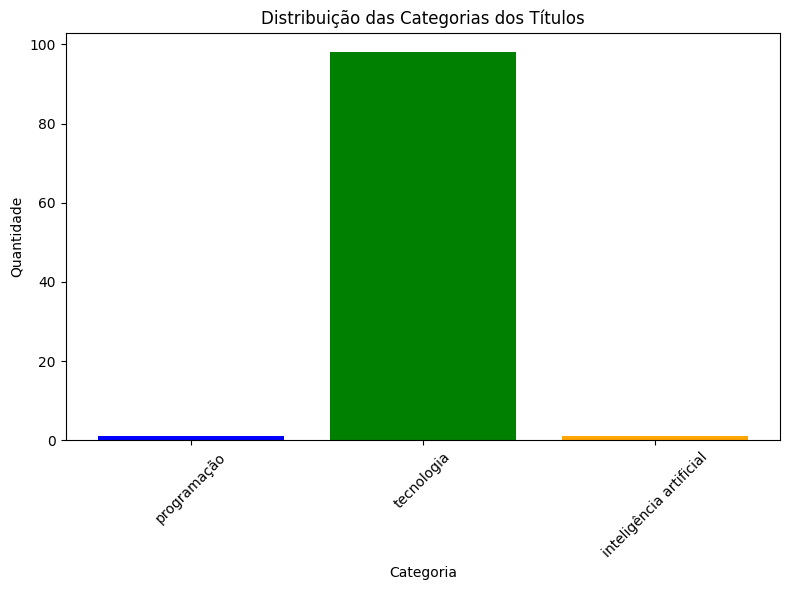

In [8]:
import matplotlib.pyplot as plt

# Contando as postagens por categoria
from collections import Counter

contagem_categorias = Counter(categorias_preditas)

# Criando o gráfico de barras
labels = list(contagem_categorias.keys())
quantidades = list(contagem_categorias.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, quantidades, color=["blue", "green", "orange"])
plt.title("Distribuição das Categorias dos Títulos")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

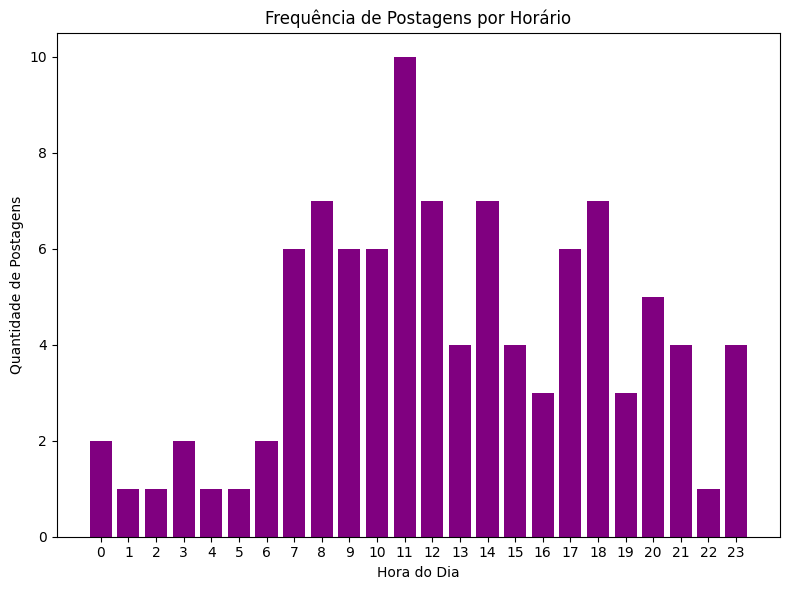

In [9]:
from datetime import datetime

# Coletando timestamps das postagens
horarios = [datetime.fromtimestamp(post.created_utc) for post in subreddit.hot(limit=100)]

# Contando postagens por horário (hora do dia)
horas = [horario.hour for horario in horarios]
contagem_horas = Counter(horas)

# Criando o gráfico de frequência por horário
plt.figure(figsize=(8, 6))
plt.bar(contagem_horas.keys(), contagem_horas.values(), color="purple")
plt.title("Frequência de Postagens por Horário")
plt.xlabel("Hora do Dia")
plt.ylabel("Quantidade de Postagens")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()